```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. see different plots: https://scikit-plot.readthedocs.io/en/stable/metrics.html

```

# Classification Metrics and Evaluation

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# To eliminate Yellowbrick warming: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
import matplotlib.font_manager

import seaborn as sns

In [4]:
df = get_dataset('pima-indians-diabetes')
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Missing values?
df.isnull().mean().value_counts()

0.0    9
dtype: int64

In [6]:
y = df[['class']]
X = df.drop(columns=['class'])

In [7]:
# Are the classes balanced
y.value_counts()

class
0        500
1        268
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1, max_depth=None)
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [11]:
y_predict = rfc.predict(X_test)
y_predict.shape

(231,)

In [12]:
y_predict = y_predict.reshape(y_predict.shape[0], 1)
y_predict.shape

(231, 1)

## Confusion Matrix
A **confusion matrix** can aid in understanding how a classifier performs.

A **binary classifier** can have four classification results: `true positives (TP)`, `true negatives (TN)`, `false positives (FP)`, and `false negatives (FN)`. The first two are correct classifications.

Here is a common example for remembering the other results. Assuming positive means pregnant and negative is not pregnant, a `false positive` is like claiming a man is pregnant. A `false negative` is claiming that a pregnant woman is not (when she is clearly showing). These last two types of errors are referred to as `type 1` and `type 2` errors, respectively.

<img src="images/type1_type2_errors.png" alt="" style="width: 650px;"/>

Another way to remember these is that `P (for false positive)` has one straight line in it (`type 1 error`), and `N (for false negative)` has two vertical lines in it (`type 2 error`).

In [13]:
tp = ((y_test == 1) & (y_test == y_predict)).sum().values[0]
tn = ((y_test == 0) & (y_test == y_predict)).sum().values[0]
fp = ((y_test == 0) & (y_test != y_predict)).sum().values[0]
fn = ((y_test == 1) & (y_test != y_predict)).sum().values[0]

In [14]:
f'tp = {tp}, tn = {tn}, fp = {fp}, fn = {fn}'

'tp = 46, tn = 131, fp = 19, fn = 35'

Well-behaving classifiers ideally have high counts in the true diagonal. We can create a DataFrame using the sklearn `confusion_matrix` function.

In [15]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=[
        "Predicted 0",
        "Predicted 1",
    ],
    index=["True 0 (Healthy)", "True 1 (Diabetes)"],
)

,Predicted 0,Predicted 1
True 0 (Healthy),131,19
True 1 (Diabetes),35,46


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/base.py:230: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not 

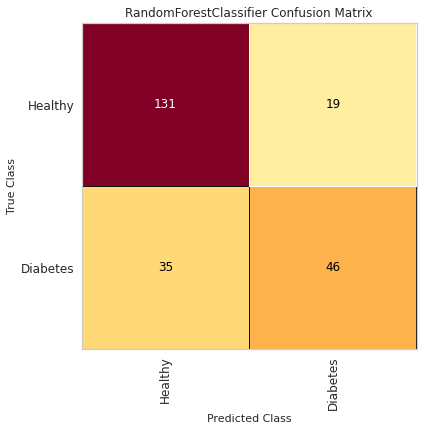

In [16]:
from yellowbrick.classifier import (
    ConfusionMatrix,
)

mapping = {0: "Healthy", 1: "Diabetes"}

fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    rfc,
    classes=["Healthy", "Diabetes"],
    label_encoder=mapping,
)

cm_viz.score(X_test, y_test)
cm_viz.poof()
fig.savefig("images/confusion_matrx.png", dpi=300)

**Confusion matrix:** The upper left and lower right are correct classifications. The lower left is false negative. The upper right is false positive.

## Metrics
The [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) module includes metrics to evaluate classification models. **Metric functions ending in `loss` or `error` should be minimized. Functions ending in `score` should be maximized.**

In [17]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

The `sklearn.metrics` module implements many **common classification metrics**, including:
- **accuracy:** Percent of correct predictions
- **average_precision:** Precision recall curve summary
- **f1:** Harmonic mean of precision and recall
- **neg_log_loss:** Logistic or cross-entropy loss (model must support `predict_proba`)
- **precision:** Ability to find only relevant samples (not label a negative as a positive)
- **recall:** Ability to find all positive samples
- **roc_auc:** Area under the receiver operator characteristic curve

f1, precision, and recall all support the following suffixes for `multiclass classifers`:
- **_micro:** Global weighted average of metric
- **_macro:** Unweighted average of metric
- **_weighted:** Multiclass weighted average of metric
- **_samples:** Per sample metric

These strings can be used as the `scoring` parameter when doing grid search, or you can use functions from the `sklearn.metrics` module that have the same names as the strings but end in `_score`. See the following note for examples.

### Accuracy
**Accuracy** is the percentage of correct classifications. What is good accuracy? It depends. If I’m predicting fraud (which usually is a rare event, say 1 in 10,000), I can get very high accuracy by always predicting not fraud. But this model is not very useful. Looking at other metrics and the cost of predicting a false positive and a false negative can help us determine if a model is decent. See also `balanced accuracy` (below) for imbalanced classes.

In [18]:
(tp + tn) / (tp + tn + fp + fn)

0.7662337662337663

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7662337662337663

<img src="images/precision_recall.png" alt="" />

- **precision:** Ability to find only relevant samples (not label a negative as a positive)
- **recall:** Ability to find all positive samples

From: https://en.wikipedia.org/wiki/F1_score

### Recall
**Recall** (also called `sensitivity` or `True Positive Rate`) is the percentage of positive values correctly classified. It is ability to find all positive samples. **Find everything you need**. `How many relevant items are selected?`

In [23]:
# Recall, Hit rate, Sensitivity, True Positive Rate
TPR = tp / (tp + fn)
TPR

0.5679012345679012

In [24]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.5679012345679012

### Precision
**Precision** is the percent of positive predictions that were correct. It is ability to find only relevant samples (not label a negative as a positive). **Limit junk level**. `How many selected items are relevant?`

In [25]:
# Precision, Positive Predictive Value
PPV = tp / (tp + fp)
PPV

0.7076923076923077

In [26]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.7076923076923077

### Specificity

<img src="images/sensitivity_and_specificity.png" alt="" />

From: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [27]:
# Selectivity, Specificity, True Negative Rate
TNR = tn / (tn + fp)
TNR

0.8733333333333333

### False Positive Rate
In statistics, when performing multiple comparisons, a `false positive ratio` (also known as `fall-out` or `false alarm ratio`) is the probability of falsely rejecting the null hypothesis for a particular test. 

From: https://en.wikipedia.org/wiki/False_positive_rate

In [40]:
# False Positive Rate
FPR = fp / (tn + fp)
FPR

0.12666666666666668

### Negative Predictive Value

From: https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values

In [28]:
# Negative Predictive Value
NPV = tn / (tn + fn)
NPV

0.7891566265060241

### Balanced Accuracy
From: https://en.wikipedia.org/wiki/Precision_and_recall

In [29]:
# Balanced Accuracy
BA = (TPR + TNR) / 2
BA

0.7206172839506173

### F1 Score / Metric
**F1** is the harmonic mean of recall and precision.

In [22]:
pre = tp / (tp + fp)
rec = tp / (tp + fn)
(2 * pre * rec) / (pre + rec)

0.6459627329192547

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.6459627329192547

### F beta Score / Metric
Two other commonly used **F measures** are the **F2 measure**, which weights recall higher than precision, and the **F0.5 measure**, which puts more emphasis on precision than recall.

From: https://en.wikipedia.org/wiki/Precision_and_recall

In [33]:
# F2 Score -> More on Recall
beta_sqared = 2**2
F2 = (1 + beta_sqared) * PPV * TPR / ((beta_sqared * PPV) + TPR) 
F2

0.5912596401028278

In [34]:
# F0.5 Score -> More on Precision
beta_sqared = 0.5**2
F05 = (1 + beta_sqared) * PPV * TPR / ((beta_sqared * PPV) + TPR) 
F05

0.6744868035190617

## Classification Report
Yellowbrick has a **classification report** showing `precision`, `recall`, and `f1` scores for both positive and negative values.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/base.py:230: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


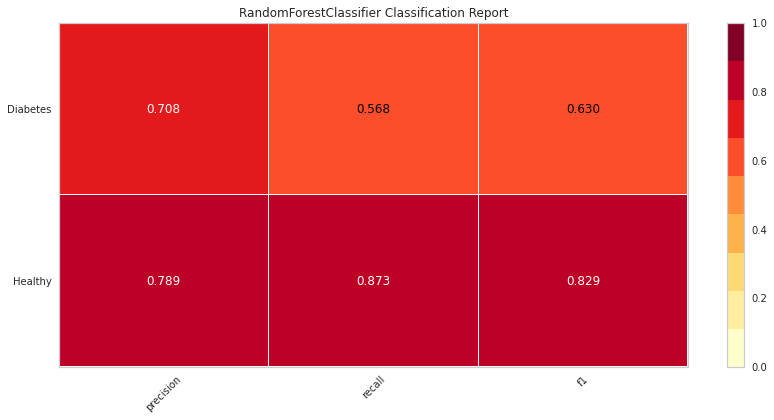

In [35]:
from yellowbrick.classifier import (
    ClassificationReport,
)

fig, ax = plt.subplots(figsize=(12, 6))
cm_viz = ClassificationReport(
    rfc,
    classes=["Healthy", "Diabetes"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()
fig.savefig("images/classification_report.png", dpi=300)

## ROC Curve and 
A **Receiver Operating Characteristic (ROC)** curve illustrates how the classifier performs by tracking the true positive rate (`TPR`, recall, sensitivity) as the false positive rate (`FPR`, inverted specificity) changes.

A rule of thumb is that the plot should bulge out toward the top-left corner. A plot that is to the left and above another plot indicates better performance. The diagonal in this plot indicates the behavior of a random guessing classifier. By taking the **Area Under Curve (AUC)**, you get a metric for evaluating the performance.

In [38]:
y_test.head()

,class
730,1
198,1
24,1
417,1
387,1


In [39]:
y_predict[:5]

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_predict)

0.7206172839506172

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/base.py:230: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


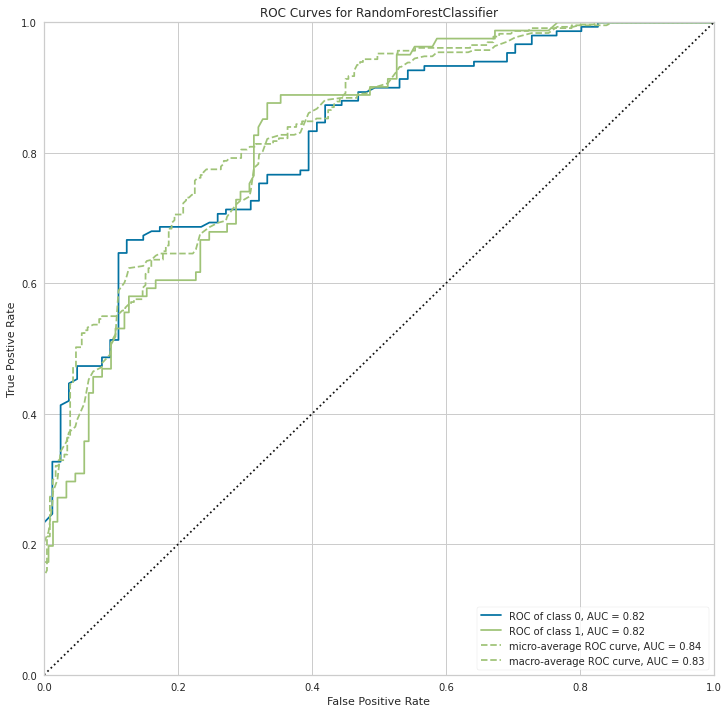

In [42]:
from yellowbrick.classifier import ROCAUC

fig, ax = plt.subplots(figsize=(12, 12))
roc_viz = ROCAUC(rfc)
roc_viz.score(X_test, y_test)

roc_viz.poof()
fig.savefig("images/roc.png", dpi=300)

## Precision-Recall Curve
`The ROC curve may be overly optimistic for imbalanced classes`. Another option for evaluating classifiers is using a **precision-recall curve**. Classification is a balancing act of finding everything you need (`recall`) while limiting the junk results (`precision`). This is typically a trade-off. As recall goes up, precision usually goes down and vice versa.

In [43]:
from sklearn.metrics import (
    average_precision_score,
)

average_precision_score(y_test, y_predict)

0.5534144867478201

0.7124958410011633


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/usr/local/lib/python3.8/dist-packages/yellowbrick/base.py:359: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


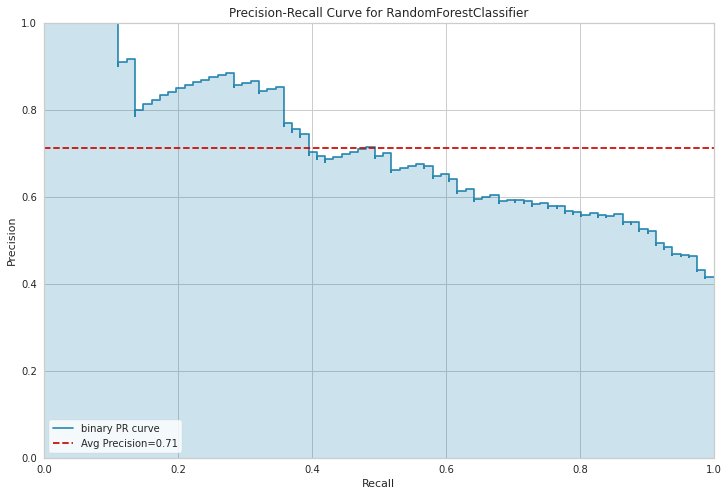

In [44]:
from yellowbrick.classifier import (
    PrecisionRecallCurve,
)

fig, ax = plt.subplots(figsize=(12, 8))
viz = PrecisionRecallCurve(
    RandomForestClassifier(max_depth=3)
)
viz.fit(X_train, y_train)
print(viz.score(X_test, y_test))
viz.poof()
fig.savefig("images/precision_recall_curve.png", dpi=300)

## Cumulative Gains Plot
A **cumulative gains plot** can be used `to evaluate a binary classifier`. It models the `true positive rate (sensitivity)` against the `support rate (fraction of positive predictions)`. The intuition behind this plot is to sort all classifications by predicted probability. Ideally there would be a clean cut that divides positive from negative samples. If the first 10% of the predictions has 30% of the positive samples, you would plot a point from (0,0) to (.1, .3). You continue this process through all of the samples.

`A common use for this is determining customer response`. The cumulative gains curve plots the support or predicted positive rate along the x-axis. Our chart labels this as `"Percentage of sample"`. It plots the sensitivity or true positive rate along the y-axis. This is labeled as `"Gain"` in our plot.

**If you wanted to contact 90% of the customers that would respond (sensitivity), you can trace from .9 on the y-axis to the right until you hit that curve. The x-axis at that point will indicate how many total customers you need to contact (support) to get to 90%.**

In this case we aren’t contacting customers that would respond to a survey but predicting if someone has diabetes. If we ordered all patients according to our model by how likely they are to have diabetes, if you took the first 60% of them, you would have 90% of the survivors. If you have an associated cost per contact and revenue per response, you can calculate what the best number is.

In general, a model that is to the left and above another model is a better model. The best models are lines that go up to the top (if 10% of the samples are positive, it would hit at (.1, 1)) and then directly to the right. If the plot is below the baseline, we would do better to randomly assign labels that use our model.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


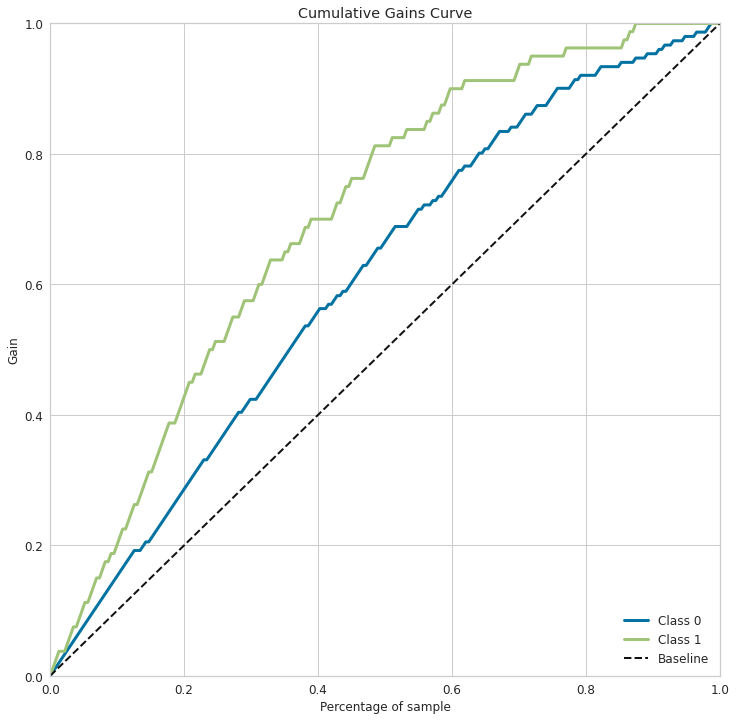

In [29]:
import scikitplot as skplt

fig, ax = plt.subplots(figsize=(12, 12))

y_probas = rfc.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(
    y_test, 
    y_probas, 
    ax=ax,
)

fig.savefig("images/cumulative_gains_plot.png", dpi=300, bbox_inches="tight",)

## Lift Curve
A **lift curve** is another way of looking at the information in a cumulative gains plot. The `lift` is how much better we are doing than the baseline model. In our plot below, we can see that if we sorted our Diabetes patients by the has-diabetes probability and took the first 20% of them, our lift would be about 2.2 times (the gain divided by sample percent) better than randomly choosing patients. We would get 2.2 times as many patients.

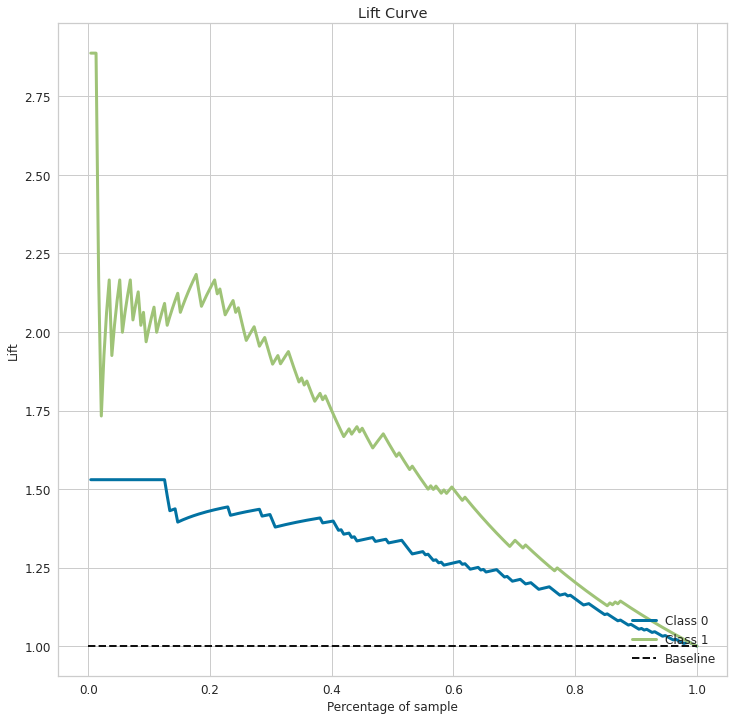

In [30]:
fig, ax = plt.subplots(figsize=(12, 12))

skplt.metrics.plot_lift_curve(
    y_test, 
    y_probas, 
    ax=ax,
)

fig.savefig("images/lift_curve.png", dpi=300, bbox_inches="tight",)

## Class Balance
**When the relative class sizes are different, `accuracy` is not a good evaluation metric.** When splitting up the data into training and test sets, use `stratified sampling` so the sets keep a relative proportion of the classes. The `test_train_split` function does this when you set the `stratify` parameter to the labels.

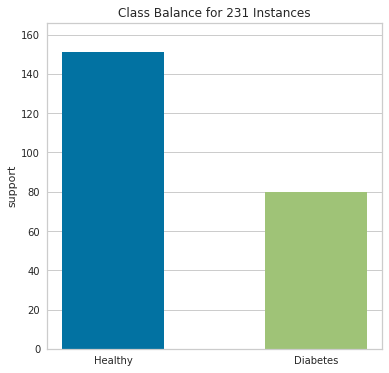

In [31]:
from yellowbrick.classifier import ClassBalance

fig, ax = plt.subplots(figsize=(6, 6))
cb_viz = ClassBalance(labels=["Healthy", "Diabetes"])
cb_viz.fit(y_test.values.reshape(-1, 1).flatten())
cb_viz.poof()
fig.savefig("images/class_balance.png", dpi=300)

In [32]:
y_test

,class
668,0
324,0
624,0
690,0
473,0
...,...
619,1
198,1
538,0
329,0


In [33]:
y_test.values.reshape(-1, 1).flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

## Class Prediction Error
The **class prediction error plot** from Yellowbrick is a bar chart that visualizes a `confusion matrix`.

In [34]:
y_test_arr = y_test.values.reshape(-1, 1).flatten()
y_test_arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/base.py:230: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


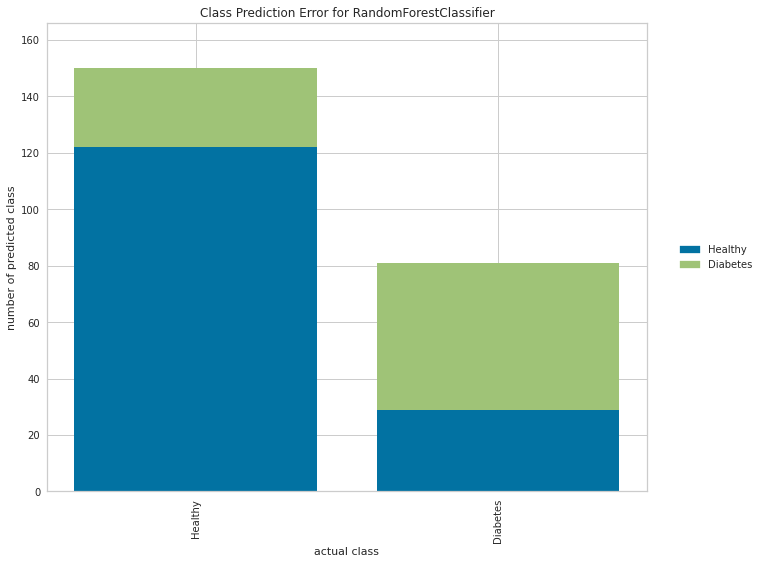

In [35]:
from yellowbrick.classifier import (
    ClassPredictionError,
)

fig, ax = plt.subplots(figsize=(12, 8))
cpe_viz = ClassPredictionError(
    rfc, classes=["Healthy", "Diabetes"]
)
cpe_viz.score(X_test, y_test_arr)
cpe_viz.poof()
fig.savefig("images/class_prediction_error.png", dpi=300)

**Class prediction error:** At the top of the left bar are people who are healthy, but we predicted that they have diabetes (`false positive`). At the bottom of the right bar are people who has diabetes, but the model predicted they are healthy (`false negative`).

## Discrimination Threshold
Most `binary classifiers` that predict probability have a **discrimination threshold** of 50%. If the predicted probability is above 50%, the classifier assigns a positive label. The **discrimination threshold plot** moves that threshold value between 0 and 100 and shows the impact to `precision`, `recall`, `f1`, and `queue rate`.

This plot can be useful to view the `trade-off between precision and recall`. Assume we are looking for fraud (and considering fraud to be the positive classification). To get high `recall` (catch all of the fraud), we can just classify everything as fraud. But in a bank situation, this would not be profitable and would require an army of workers. To get high `precision` (only catch fraud if it is fraud), we could have a model that only triggers on cases of extreme fraud. But this would miss much of the fraud that might not be as obvious. There is a trade-off here.

The `queue rate` is the percent of predictions above the threshold. You can consider this to be the percent of cases to review if you are dealing with fraud.

If you have the cost for positive, negative, and erroneous calculations, you can determine what threshold you are comfortable with.

The following plot is useful to see what `discrimination threshold` will maximize the `f1` score or adjust `precision` or `recall` to an acceptable number when coupled with the queue rate.

Yellowbrick provides this visualizer. This visualizer shuffles the data and runs 50 trials by default, splitting out 10% for validation.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
 

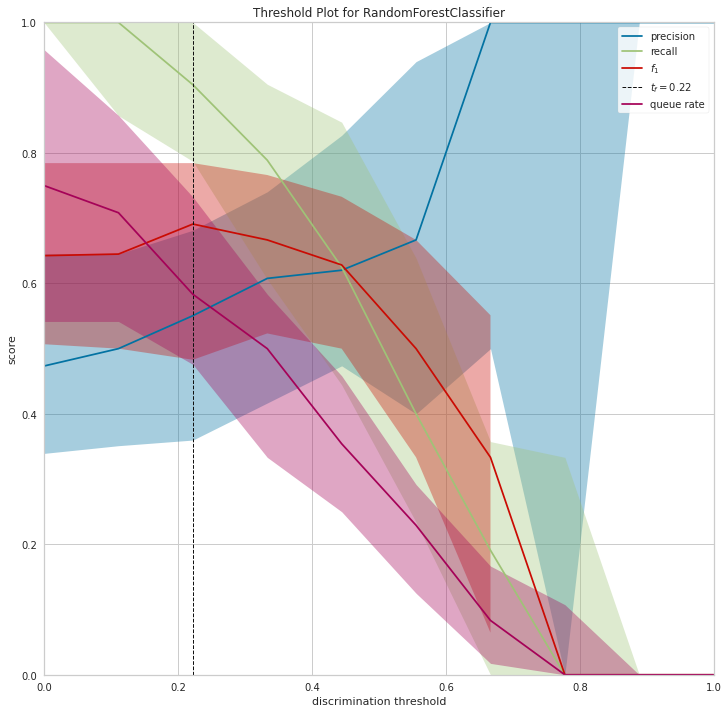

In [36]:
from yellowbrick.classifier import (
    DiscriminationThreshold,
)

fig, ax = plt.subplots(figsize=(12, 12))
dt_viz = DiscriminationThreshold(rfc)
dt_viz.fit(X_test, y_test_arr)
dt_viz.poof()
fig.savefig("images/discrimination_thershold.png", dpi=300)